# **Music Recommendation System** 


## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

- With the ever-increasing volume of songs becoming available on the Internet,searching for songs of interest has become a tedious task in itself for users.
- Every Internet based company wants to increase customer time spent on their platform and increase company's revenue. 
- By using smart recommendation systems(one like Spotify) that can recommend songs based on users’ likes/dislikes among millions of customers and billions of songs would be Win-Win for customers and internet based companies.

**The objectives:** What is the intended goal?<br>

- Build a recommendation system to propose the top 10 songs for a user based on the likelihood of them listening to those songs.
- Build recommendation system to increase customer time spent on their platform and increase company's revenue. 


**The key questions:** What are the key questions that need to be answered?<br>

- Main question is to figure out what kind of content customers are most likely to consume.
- What are the most popular songs to suggest a new user.
- Identify songs based on ratings, reviews, artists, genre, year released etc.
- Identify songs for existing users that are similar to their listening history.
- Identify users who have similar tastes in music and recommend similar songs to them.  


**The problem formulation:** What are we trying to solve using data science?<br>
- Build recommendation system using different models.
- For new users who have not history/data, we build recommendation systems based on populatrity and recommend popular songs.
- For existing users we build recommendation system models using collaborative filtering, matrix factorization and other methods. We then compare the efficiancy of the models and choose the best one to recommend songs to users. 


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP/Capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ADSP/Capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(n=10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df.head(n=10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

- count_df dataframe:
 * There are 2000000 observations in the data set.
 * user_id and song_id are of object data type, we may have to add a numeric label encoding to this to make it more usable. 
 * play_count variable is already of integer type.
 * 'Unnamed: 0' variable is of integer type but we can delete this column as it doesn't provide much info.
 

- song_df dataframe:
 * All the columns are of object data type except year. 
 * There are '0's for some of the rows for the variable year, probably missing years. 
 * There are overall 1000000 non-null observations in the dataset, probably some duplicates as well. 
 * There are some values missing in columns title and release.

 We need to drop the duplicates in Song_df dataframe before merging both the dataframes.  We need to keep all the records in count_df dataset, i.e. left merge the dataset.
 




In [8]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [9]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [10]:
# Apply label encoding for "user_id" and "song_id"

from sklearn.preprocessing import LabelEncoder
data=df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
df['user_id']=data['user_id']
df['song_id']=data['song_id']
df.head()



,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [11]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [12]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [13]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [14]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130398 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      130398 non-null  int64 
 1   song_id      130398 non-null  int64 
 2   play_count   130398 non-null  int64 
 3   title        130398 non-null  object
 4   release      130398 non-null  object
 5   artist_name  130398 non-null  object
 6   year         130398 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 8.0+ MB


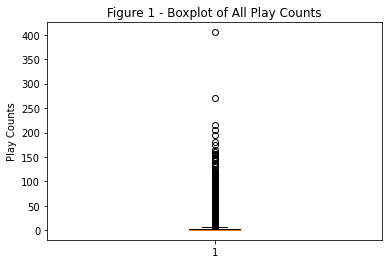

In [15]:
#Boxplot to visualize the Min,Q1,Median,Q3,Max for the variable Play Count and also to find the Outliers
plt.boxplot(df_final['play_count'])

plt.title('Figure 1 - Boxplot of All Play Counts')
plt.ylabel('Play Counts')
plt.show()

In [16]:
#print(df_final['play_count'].unique())

df_final.iloc[: , 2 :3].describe()



,play_count
count,130398.000000
mean,2.682173
std,4.927500
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,405.000000


In [17]:
print("90th percentile of arr : ",
       np.percentile(df_final.play_count, 90))


90th percentile of arr :  5.0


In [18]:
pd.set_option("display.max_rows", 25) #None
df_final['play_count'].value_counts()

1      72473
2      23890
3      10774
4       5874
5       4865
       ...  
135        1
80         1
125        1
117        1
70         1
Name: play_count, Length: 126, dtype: int64

In [19]:
# Drop records with play_count more than(>) 5
df_final=df_final.drop(df_final.index[df_final['play_count'] > 5])


In [20]:
# Check the shape of the data
df_final.shape

(117876, 7)

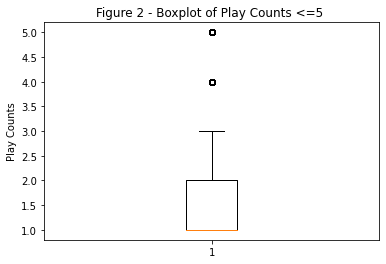

In [21]:
#Boxplot to visualize the Min,Q1,Median,Q3,Max for the variable Play Count and also to find the Outliers
plt.boxplot(df_final['play_count'])

plt.title('Figure 2 - Boxplot of Play Counts <=5 ')
plt.ylabel('Play Counts')
plt.show()

## **Exploratory Data Analysis**

In [22]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [23]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [24]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [25]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**
- There are **3155 users** in the dataset.
- There are **563 songs** and **232 artists** in the dataset.
- As per the number of unique users and songs, there is a **possibility of 3155 * 563 = 1,776,265 interactions** in the dataset. Not every user has interacted with every song in the dataset. So, we can build a recommendation system to recommend songs/artists to users which they have not interacted with.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [26]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Most interacted users

In [27]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**
The **song with song_id: 8582 has been interacted by most users**(- **751**).
- But still, there is a possibility of 3155-751 = 2404 more interactions as we have 3155 unique users in our dataset. For those 2404 remaining users, we can build a recommendation system to predict who is most likely to interact with this song.

- Also, out of these 751 interactions, we need to consider the distribution of ratings as well to check whether this song is the most liked or most disliked song.


Songs played in a year

In [28]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


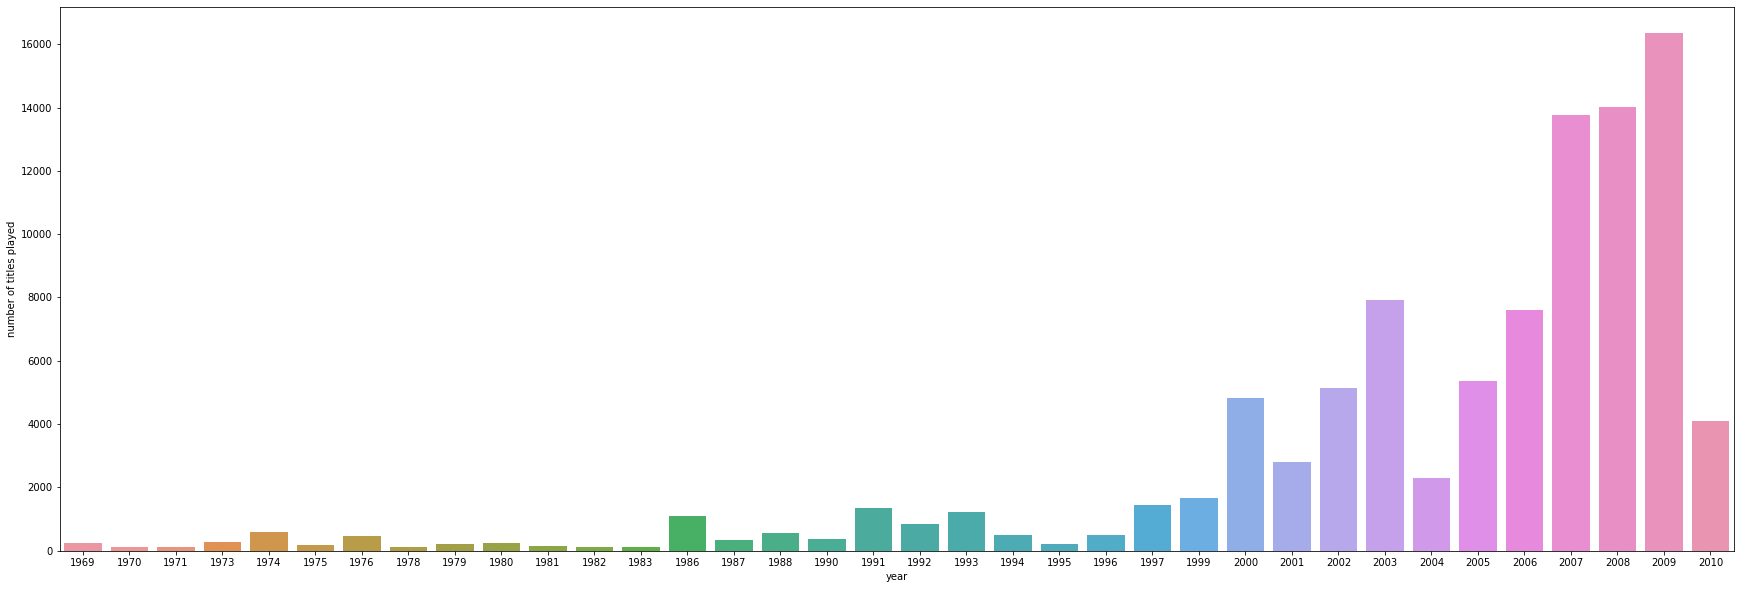

In [29]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median
            )

# Set the y label of the plot
plt.ylabel('number of titles played') 


# Show the plot
plt.show()

#### **Observations and Insights:** # 

- It looks like the **majority titles played were from year 2009 followed by 2008, 2007, 2003 and 2006**.  
- The song titles from **1999 and before were hardly played compared to the newer years**. 
- Numbers of titles played in the year 2003  was slightly more than 2006. 
- We may or may not have enough data for the year 2010, so probably why it looks less popular.




**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>

We can explore the below techniques for creating the recommendation systems.
- Popularity-Based Recommendation System
- User User Similarity-Based Collaborative Filtering recommendation system
- Item Item Similarity-based collaborative filtering recommendation system
- Model Based Collaborative Filtering - Matrix Factorization 
- Cluster Based Recommendation System
- Content Based Recommendation Systems

**Overall solution design:** What is the potential solution design?<br>

**Model 1: Popularity-Based Recommendation System**
- Popularity/Rank-based recommendation systems provide recommendations based on the most popular items. This kind of recommendation system is useful when we have cold start problems (when the user has no history in the dataset).
-  To build the rank-based recommendation system, we take average of all the ratings provided to each song and then rank them based on their average rating.


**Model 2: Similarity/Neighborhood based Collaborative Filtering Based Recommendation System**
- In this type of recommendation system, we do not need any information about the users or items. We only need user-item interaction data to build a collaborative recommendation system.
- We use Surprise library here.
- In this we build a similarity based recommendation system using cosine similarity and using KNN to find similar users who are the nearest neighbor to the given user.
- We look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, we check Precision@k, Recall@k, F1-Score@k to access the recommendation system.
- Once the baseline recommender is built, we can imrpove it by tuning its hyperparameters for the KNNBasic algorithms and find the RMSE for tuned user based collaborative filtering recommendation system.
- Then we build the final model by using tuned values of the hyperparameters, which we received by using grid search cross-validation. We check the RMSE again and comparte with the earlier model. 
- We can find out the similar users to a given user or its nearest neighbors based on this KNNBasic algorithm, finding 5 most similar user to the user_id=1 and further Predicting the top 5 items for userId=1.


**Model 3: Item based Collaborative Filtering Recommendation System**
- We now look into similarity-based collaborative filtering where similarity is calculated between items, i.e. songs here.
- We use Surprise library here.
- We define similarity measure, nearest neighbour using KNNBasic algorithm.
We observe the baseline model for RMSE, F_1 Score on the test set. 
- We can try to improve the performance number by using GridSearchCV to tune different hyperparameters of this algorithm. (Performing 3-fold cross validation to tune the hyperparameters). 
- At this point we build the final model by using optimal values of the hyperparameters which we received by using grid search cross-validation.
- We can also find out the similar items to a given item or its nearest neighbors based on this KNNBasic algorithm. 
- We can find 5 most similar items to the song_id=1.
-  We can also predict top 5 songs for user_id=1 with similarity based recommendation system. 
  

**Model 4: Matrix Factorization**
- Model-based Collaborative Filtering is a personalized recommendation system. The recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user.
- We use Surprise library here.
- SVD is used to compute the latent features from the user-item matrix. But SVD does not work when we miss values in the user-item matrix. 
We find predicted rating for user/song combination here.
- We can improve matrix factorization based recommendation system by tuning its 3 of it's hyperparameters. **n_epochs**(The number of iteration of the SGD algorithm), **lr_all** (The learning rate for all parameters), **reg_all**(The regularization term for all parameters). 
- We build the final model by using optimal values of the hyperparameters which we received by using grid search cross-validation.
- We can now predict the rating for an user with user/song combination
- We can recommend the songs using the optimized svd model.


**Model 5: Cluster-Based Recommendation System**
- In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on ratings from other users in the same cluster.
- We use Surprise library here.
- We use CoClustering algorithm, check for RMSE, F1 Scores and predict the ratings for the user/song combinations.
- We can further improve clustering-based recommendation system by tuning its hyperparameters, **n_cltr_u (Number of user clusters), n_cltr_i (Number of item clusters), n_epochs (Number of iteration of the optimization loop), 
random_state, verbose**.
- We will build final model by using tuned values of the hyperparameters received after using the Grid search cross-validation.
- We now predict the rating for the user/song combinations and recommend songs.
- We also can implement the recommendation algorithm based on the optimized KNNBasic model 
- We further correct the Ratings and Ranking of the above songs.


**Model 6: Content-Based Recommendation System**
- In a content-based recommendation system, we will use the feature - text, i.e.reviews to find similar songs. 
Text data generally contains pronunciation, stopwords, and non-ASCII characters, which makes it very noisy. So, we will first need to pre-process the text and then we will generate features from the text to compute similarities between the texts/reviews.
- We use nltk (natural language toolkit library) here.
- We merge/pre-process the data and need to use TF-IDF feature extraction technique to extract features, which we later use to compute similar songs based on these texts.
- Once we have extracted features from the text data using TF-IDF feature extraction, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.
- Finally, we create a function to find the most similar songs to recommend for a given song.


**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>

- To evaluate the performance of the **Collaborative Filtering Based Recommendation System** models and **Cluster Based Recommendation System**, **Matrix Factorization**, precision@k and recall@k are used in this case study. Using these two metrics F_1 score is calculated for each working model.
We can try to improve the performance of these models using hyperparameter tuning.

- We also evaluate RMSE which is a measure of error to check how far the overall predicted ratings are from the actual ratings.

- Popularity/Rank-based recommendation systems provide recommendations based on the most popular items. This kind of recommendation system is useful when we have cold start problems, i.e. new user.

- Content Based Recommendation system - If we want to base our recommendations entirly on the user's history, this recommendation works well. 






Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

# **Milestone 2**

### **Dataset created from Milestone 1**

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [31]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']       # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']      # Hint: Use groupby function on the song_id column



In [32]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
# Build the function to find top n songs

# It gives top n songs among those being watched for more than min_interactions
def top_n_songs(data, n, min_interaction = 100):
    
    # Finding songs with interactions greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    # Sorting values with respect to the average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [34]:
# Recommend top 10 songs using the function defined above

#Recommending top 10 with 50 minimum interactions based on popularity
list(top_n_songs(final_play, 10, 50))


[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [35]:
#Recommending top 10 songs with 100 minimum interactions based on popularity
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

In [36]:
#Recommending top 10 songs with 200 minimum interactions based on popularity
list(top_n_songs(final_play, 10, 200))

[5531, 2220, 614, 352, 1664, 6246, 4448, 1334, 8019, 7496]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [37]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 15.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626461 sha256=12b50a05debbf4ac6e464737a222efdad4a5854d8ed61b9a0b113d0361c16bf4
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [38]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

F1_score is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important**, it is useful to use this metric because it is representative of both of them. 
We can also use **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**

In [39]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

We use threshold 1.5 minimum because assuming that the user is likely to listen to the song more than once. Anything less than 1 won't make sense and anything more than 2 might be an overkill. 

Experimented using Threshold=1.6, 1.4. Threshold=1.5 seemed to have slightly better Precision values and lesser Recall values. 

In [40]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size= 0.4, random_state = 42) # Take test_size = 0.4


**Think About It:** How changing the test size would change the results and outputs?

When test_size 0.2 was used the Precision, Recall, F1_score reduced a bit. test_size=0.4 had slightly better values.

In [41]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- We have calculated **RMSE= ~1.088** to check **how far the overall predicted ratings** are from the **actual ratings**.
- Intuition of Recall: We are getting a **recall of ~0.69**, which means out of **all the relevant songs 69% are recommended**. 
- Intuition of Precision: We are getting a **precision of ~ 0.39**, which means **out of all the recommended songs 39% are relevant**.
- Here **F_1 score** of the **baseline model is ~0.50**. It indicates that **50% recommended songs were relevant and relevant songs were recommended**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

In [42]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [43]:
df_final[df_final.song_id == 3232].user_id.unique() # Additional check list of users who have listened to song_id 3232 ( to confirm 6958 wasn't in this)

array([27018, 69587,  2399, 39613, 40245, 35633, 24883, 63684, 53169,
        4165,  1159, 26605, 56252, 52655, 48366, 28087, 58127, 69423,
       73042,  7834, 53424, 29597, 39330, 34876, 29822,   935, 66045,
       41236, 50331, 41945, 35775, 30009, 14182, 69136, 19641, 37390,
       34465,  4633, 31360,  1041, 23562, 31438, 28208, 35528, 20132,
        2362, 70271, 50017,  3732, 38188, 61544, 44214,  9155, 50849,
       43844, 57240, 23855, 26321, 24727, 38124, 61756, 54249, 31663,
       18283, 69690, 33403, 20548,  4379, 72891, 14310, 68372, 56157,
       74130,  8756, 28908, 28806, 41214, 51528, 53223, 31116, 44247,
       23532, 61794, 31704, 42011, 58140, 33227, 56249, 51796, 63465,
        4637, 52159, 56097, 50283,  4661, 35749, 34048, 29040, 37043,
       47325, 10604, 68956, 74749, 43609, 47058,  4456, 35251,  2756,
       50180, 65408, 55238, 62823, 33913, 18978, 20122,  6240, 75144,
       13480, 40042, 44652, 59244, 49507, 66596, 40451, 64746, 25270,
       56273, 18103,

In [44]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

**Predicting play_count for a sample user with a listened song**
- The 1st output shows that **the actual play_count (2) is not so far from the predicted play_count(1.8) for this user-item (6958/1671) pair** by this **user-user-similarity-based baseline model**.
- The **output** also contains **"actual_k"**. It is the value of **K in KNN** that is used while training the model, i.e. k=40.

**Predicting play_count for a sample user with a song not-listened by the user** 
- The output shows that **estimated play_count =~1.6 for the song 3232 which was not listened by user 6958**. 
- Let's see if we can fine tune the model to get a better estimate. 

Now, let's try to tune the model and see if we can improve the model performance.

In [45]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0461718809004152
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [46]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model has increased slightly in comparison to the baseline model, i.e from ~0.50 to ~0.525**.
- ** Precision increased to 0.413 and Recall to 0.721**. These are better than Baseline model.  
- **The RMSE of the model has gone down very slighly as well when compared to the model before hyperparameter tuning, i.e from ~1.088 to ~ 1.052**. 
- We can say that the model performance improved very little after hyperparameter tuning.


In [47]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True) 

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [48]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True) 

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:** 

**Predicting play_count for a sample user with a listened song**

- If we compare the predicted rating with the actual rating, we can say that the **predicted rating by the tuned model (1.9) is closer to the actual rating (2.0) in comparison to the prediction by the baseline model**.

**Predicting play_count for a sample user with a song not listened by the user**
- The output shows that estimated play_count=1.45 for the song 3232 which was not listened by user 6958. However the baseline model predicted play_count=1.6 for this user/song combination. 



**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [49]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [50]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_products:
        
        # Predicting the play_count for those non interacted song_ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted ratings
        recommendations.append((song_id, est))
        

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    # Returing top n highest predicted played songs for this user
    return recommendations[:top_n] 

    

In [51]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 10, sim_user_user_optimized)

In [52]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723
5,1664,2.385622
6,6246,2.345259
7,1348,2.321353
8,7496,2.269817
9,2852,2.257756


**Observations and Insights:**
- After building this get_recommendations function, we predicted top 5 recommendations for user 6958 with a a similarity-based recommendation engine.
- The play_counts all seem to be ~2.3 - ~2.5.
- Commonly higher the "play_count" of a song, more it is liked by users. Let's try and correct the play_counts and ranking for these songs in the next step.

### Correcting the play_counts and Ranking the above songs

In [53]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

We could add quantity 1/np.sqrt(n) instead of subtracting here to get more optimistic predictions. We will probably have corrected play_counts > 5 though and we have already restricted the dataset to play_counts <=5. Hence, it may not make sense for corrected play_counts > 5.

Generally, higher the **"play_count" of a song, more reliable the play_count is**. It has been **empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_count of the song**.

In [54]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,5531,618,2.553335,2.513109
4,317,411,2.518269,2.468943
2,5943,423,2.390723,2.342101
5,1664,388,2.385622,2.334854
8,4954,183,2.406776,2.332854
9,8635,155,2.396606,2.316284
3,6246,422,2.345259,2.296580
1,1348,476,2.321353,2.275518
6,7496,301,2.269817,2.212178
7,2852,234,2.257756,2.192384


**Observations and Insights:**
Generally, higher the "play_count" more reliable to recommend . It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play count of the song.

- We have corrected the play_count as shown above. The play_count is still very similar to the predicted ones earlier but a bit more conservative now. For instance, song_id 317 had predicted play_count=~2.518 and now corrected play_count= ~2.468.


### Item Item Similarity-based collaborative filtering recommendation systems 

In [55]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
- **F_1 score** of this item-item similarity based **baseline model** is **~0.4**. We will try to improve this later by tuning different hyperparameters of this algorithm using **GridSearchCV**.
- RMSE is ~1.039.

In [56]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True) 


user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [57]:
df_final[df_final.user_id == 27018].song_id.unique()  # Check user_id who has not listened to song_id 1671. 

array([  97,  122,  139,  693,  719,  765,  786,  861, 1118, 1406, 1461,
       1519, 1682, 1696, 1907, 1983, 2187, 2234, 2389, 2557, 3232, 3356,
       3518, 3548, 3655, 4152, 4298, 4377, 4510, 4522, 4545, 4653, 4724,
       4954, 5023, 5158, 5223, 5248, 5305, 5345, 5417, 5457, 5877, 6079,
       6121, 6148, 6191, 6232, 6293, 6350, 6500, 6572, 6618, 6636, 6709,
       6770, 6959, 6964, 7210, 7331, 7399, 7402, 7469, 7721, 7878, 7977,
       8019, 8086, 8247, 8265, 8299, 8434, 8612, 8973, 9055, 9099, 9292,
       9436, 9447, 9476, 9702, 9771, 9989])

In [58]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(27018, 1671, verbose = True) 


user: 27018      item: 1671       r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

In [59]:
sim_item_item.predict(6958, 3232,  verbose = True) # Predicting playcount for song_id 3232 where user_id 6958 didn't listen to this before.

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**
- The item_item  similarity based model predicted a play_count of 1.36 for user 6958 for the song that was heard by them, although the actual play_count=2. Let's see if we can fine tune this mdoel to get better predicted play_count.
- We predicted the play count of 2.55 for user 27018 who had not listened to song 1671. Let's see if we can fine tune this with Gridsearchcv.


In [60]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0242534857250754
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [61]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**
- After tuning hyperparameters, F_1 score =~0.5 has improved a bit from the baseline model = ~0.4.
- RMSE still seems to be the same around ~1.03 though.

In [62]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True) 

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [63]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232,  verbose = True) 

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- The optimized model produced better play_count(1.96) for user_id 6958 and song_id 1671, which is closer to the actual play_count=2. The baseline model had predicted play_count ~1.36.

- then play count for song 3232 =1.28 for user 6958. The baseline model had predicted the play count ~1.38 for the same user/song combination.

In [64]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [65]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [66]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [67]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**
- We recommended five most similar songs to the song with inner id 0.
- We gave top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine. 
- We applied the ranking_songs function to get corrected play_count along with the predicted ones. the corrected play_count has reduced a bit when compared to predicted ones since we not only consider play_count while correcting but also the number of users who listened to the song.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [68]:
# Build baseline model using svd

# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)


RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [69]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [70]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [71]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1) 

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0132679254135935
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [72]:
# Building the optimized SVD model using optimal hyperparameters

svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)


RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**
AFter hyper tuning the parameters the F_1 score, RMSE both seems to have increased very slightly, didn't make much of a difference. 

In [73]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [74]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**
- For user: 6958 and item: 1671 - The play_count improved to 1.34 from baseline model where it estimated as 1.27. However both models are far off when compared to actual play_count which is 2. 
- For user: 6958 and item: 3232 -  The play_count increased to 1.44 whereas baseline model predicted 1.56. 



In [75]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [76]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**
It looks like the corrected play_counts reduced slightly when compared to predicted play_counts since we not only consider play_count while correcting but also the number of users who listened to the song. 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [77]:
# Make baseline clustering model

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [78]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [79]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [80]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0580392720139364
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [81]:
# Train the tuned Coclustering algorithm

# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**

- We have calculated **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**. RMSE have reduced after fine tuning the hyperparameters.
- Here **F_1 score** of the **baseline model is ~ 0.47**. 
- We tried to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm. Even then the F_1 score for tuned co-clustering model is very similar (slighl;tly worse) when compared to the baseline model **i.e. ~0.465**

In [82]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [83]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**
- This model seemed to have given the **closest estimated play_count i.e. 1.9, which is close to the actual play_count of 2** when compared to other earlier models, for the user: 6958, item: 1671 combination.
- It has predicted the **play_count of 1.24** for user: 6958 item: 3232 combination.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [84]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [85]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


**Observations and Insights:**

We now recommended top 5 songs for the user 6958 based on the predicted play_count from the recommender and also the corrected play_count using the number of users who played the particular song.
- The corrected play counts reduced a bit when compared to predicted play count since it is also taking numnber of users into consideration. 

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [86]:
df_small = df_final

In [87]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [88]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [89]:
# Let us see the shape of final_ratings data

df_small.shape

(561, 4)

In [90]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [91]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Download omw-1.4
nltk.download('omw-1.4')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [92]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [93]:
# Create tfidf vectorizer 

# Creating the TF-IDF object
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

# Making the DataFrame of song_tfidf data for reference.
pd.DataFrame(song_tfidf)


,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Compute the cosine similarity for the tfidf above output

# Calculating the cosine similarity
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [95]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [96]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [97]:
#select_song = df_final.loc[df_final['title'] == 'Bones']
#print (select_song)  #additional checks by the student


**Observations and Insights:**

- The song 'Learn To Fly' belongs to the artist_name **'Foo Fighters'** which was and the **few of our recommendations ('The Pretender', 'Everlong',)** lie in one or more of this artit and their releases.  
- Also, many other songs recommended here like "Bones" were from a **similar artist "The Killers"**. 
- It implies that the resulting recommendation system is working well with a mix of choosing songs from the same artist, similar artists, newer releases and some popular songs. 

## **Conclusion and Recommendations:** 
<br>

###**Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

- **Our objective is to build a Recommendation system to propose the top 10 songs for a user based on the likelihood of them listening to those songs to increase customer time spent on their platform and increase company's revenue**.

- In this case study , both **Precision and Recall** probably need to be optimized if the service provider would like to **minimize both the losses (False Negative and False Positive)** which increases the likelihood of users listening to the recommended songs.  **Hence, the correct performance measure is the F_1 score for our models. It is critical to have higher value of Precision and Recall for this**. 

- Threshold: **Used threshold=1.5 and also threshold=1.6 to test and see if it matters for the performance of the models**.  The Precision did seem to increase slightly when using threshold=1.6 for User-User Similarity Based model. However, Recall and F1 score seemed to perform better while using Threshold=1.5. **Since we are using F1 score as our performance measure, it was finalized as threshold=1.5** for Precision, Recall calculating function. 

- We have 3155 users, 563 songs and 232 artists in the dataset. As per the number of unique users and songs, there is a possibility of 3155 * 563 = 1,776,265 interactions in the dataset. Not every user has interacted with every song in the dataset. So, we can build a recommendation system to recommend songs/artists to users which they have not interacted with.

- After obtaining the performance measures for both Baseline and optimized models, we predicted the Play Count for a given User with the song that they have interacted with and also for a song they have not interacted with. 
Generally, higher the Play Count more reliable to recommend.  **We corrected the Play Count to not only consider number of times user played the song but also the number of users who listened to that song**.

- **We could also build a Hybrid Recommendation system to improve performance further. The combination of User-User Similarity based along with Model-Based Collaborative Filtering or Content-Based Recommendation systems will probably work better as a Recommendation system with very high performance as it uses recommendations from multiple models.**

<br>

###**Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

<br>

**Model 1: Popularity-Based Recommendation System:**
This kind of recommendation system is useful when we have cold start problems (when the user has no history in the dataset).

**Model 2: User-User Similarity-Based Collaborative Filtering Recommendation System:**
- **Baseline Results: Precision = ~0.39, Recall= ~0.69, F1 score= ~0.5, RMSE= ~1.088.**
- By tuning hyperparameters , we built an optimized model using Grid-Search Cross Validation
- **Optimized Results: Precision = ~0.413, Recall = ~0.72, F1 score = ~0.53, RMSE = ~1.05.**
- **This optimized User-User Similarity Based model performed better than rest of the models with higher values of Precision = ~0.413, Recall= ~0.72, 
F1 score= ~0.53. RMSE reduced to ~1.05 when compared to the Baseline model.** 

**Model 3: Item-Item Similarity-Based Collaborative Filtering Recommendation System:**
- **Baseline Results: RMSE=1.0394,  Precision = ~0.3, Recall = ~0.56, F1 score = ~0.39**
- **Optimized Results: RMSE=1.0328,  Precision = ~0.4, Recall = ~0.66, F1 score = ~0.5**
The precision and F1 score did improve a bit compared to the baseline model. 
 
**Model 4: Matrix Factorization:**
- **Baseline Results: RMSE=1.0252,  Precision=~0.4, Recall=~0.63, F1 score=~0.5**
- By tuning 3 of it's hyperparameters as below, built an optimized model using Grid-Search Cross Validation
 n_epochs-The number of iteration of the SGD algorithm
 lr_all- The learning rate for all parameters
 reg_all-The regularization term for all parameters. 
- **Optimized Results: RMSE=1.01, Precision= ~ 0.41, Recall= ~0.63, F1 score= ~0.5**
Optimized model performance improved slightly. 

**Model 5: Cluster-Based Recommendation System:**
- We cluster similar users together and recommend songs to a user based on Play Counts from other users in the same cluster. Used Co-Clustering algorithm to evaluated the performance and predict the Play counts for the user/song combinations.
- **Baseline Results: RMSE = ~1.05,  Precision = ~0.397, Recall = ~0.58, F1 score = ~0.47**
- Tried improving  by tuning its hyperparameters using the Grid search cross-validation.
  - n_cltr_u -Number of user clusters
  - n_cltr_i - Number of item clusters 
  - n_epochs - Number of iteration of the optimization loop
- **Optimized Results: RMSE = ~1.06,  Precision = ~0.394, Recall = ~0.56, F1 score = ~0.46**
- Optimized model performed similarly,when compared tp the baseline model here in terms of F1 score. 

 
**Model 6: Content-Based Recommendation System:**
- Used the feature “text”, by concatenating "title", "release", "artist_name" columns to create column named "text" to find similar songs. Using nltk, need to first pre-process the text and then we will extract features from the text using IDF feature extraction technique to compute similar songs.
-	Just like most models above, we derive Corrected Play counts considering the number users who have listened to a particular song.
- Finally, we create a function to find the most similar songs to recommend for a given song.


**Model performing relatively better:**
In conclusion, the User-User Similarity based Optimized model performed better in regard to Precision, Recall and F1 score. Since we are using F1 score as our Performance measure, this is the right model to pick for our Recommendation System. 

**Scope for improvement:** 
We could also build a Hybrid Recommendation systems to improve performance further . The combination of User-User Similarity based along with Model-Based Collaborative Filtering or Content-Based Recommendation systems will probably work better as a Recommendation system with very high performance as it uses recommendations from multiple models.


<br>

###**Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

**Proposal for the final Solution Design:**

- **Final proposal is to use User-User Similarity-Based Recommendation System which has given the best performance in terms of the F1-Score, Precision, Recall. We use F1 score as it the harmonic mean of both Precision and Recall values.**
- Precision=0.413 which was the highest among all the models. Higher value of Precision is also better, since it is a measure of the proportion of recommended songs that are relevant to the user. If the service provider wants to minimize the losses, then higher the precision better are the recommendations to the user. 
- Recall=0.721 which was highest among all the models. Higher value of Recall, better is the model since it is a measure of the proportion of relevant songs that were successfully recommended to the user. 
- F1 score=0.525 which was the highest among all the models. Higher value of F1 score is better, since it is a measure of the overall performance of the model considering both Precision and Recall which is harmonic mean of both. 

- **Also The User-User Similarity Based model is often considered to be a good solution for recommendation systems in a business context because it considers the preferences and behavior of individual users. This can help the recommendation system provide more personalized and relevant recommendations, which can improve the user experience and increase the likelihood of them interacting with those recommendations and further improve customer engagement and customer satisfaction.**

- **In addition, the User-User Similarity Based model is relatively simple and efficient, which makes it easy to implement and maintain in a business setting. It can also handle large amounts of data, allowing it to scale to meet the needs of a growing business.**











